In [1]:
from rdkit import Chem
from rdkit import DataStructs
import pandas as pd
import csv
from rdkit import RDLogger

In [2]:
pubs = pd.read_pickle('org_desc_fps.pkl')

In [3]:
pubs

,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,C[C@H]1[C@@](O1)(C)C(=O)O[C@@H]2[C@H]3[C@@H]([...,13.056872,-1.362581,13.056872,0.005541,0.258437,464.467,436.243,464.168247,180.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,CC1/C=C/C=C/CC/C=C/C=C/C=C/C=C/C(CC2C(C(CC(O2)...,13.088303,-2.373104,13.088303,0.020780,0.169516,1056.250,970.570,1055.566494,422.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,CC1(CC[C@@H]([C@@]2([C@@H]1C[C@H]([C@]34[C@H]2...,13.181670,-1.311875,13.181670,0.092787,0.529870,350.455,320.215,350.209324,140.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,CCN1C[C@@]2([C@@H](C[C@@H](C34[C@@H]2[C@H](C(C...,13.554961,-1.857682,13.554961,0.106156,0.299644,603.709,558.349,603.304347,238.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,[H+].C1=CC=C(C=C1)N(N=NC2=CC=C(C=C2)S(=O)(=O)[...,11.554555,-4.488263,11.554555,0.000000,0.104052,647.130,627.978,646.000725,217.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66308,C(CCl)Cl,5.054012,0.557099,5.054012,0.557099,0.436304,98.960,94.928,97.969005,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66309,CCC(C)(C(C(=O)O)O)O,10.094838,-1.696759,10.094838,0.208796,0.508241,148.158,136.062,148.073559,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66310,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,10.295093,-0.768519,10.295093,0.115185,0.543108,202.553,199.529,201.978134,68.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66311,CC(CN)O,8.236111,-0.337963,8.236111,0.337963,0.433755,75.111,66.039,75.068414,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
smiles = pubs['SMILES']

In [5]:
smiles=smiles.to_list()

In [6]:
smiles[0]

'C[C@H]1[C@@](O1)(C)C(=O)O[C@@H]2[C@H]3[C@@H]([C@@H]4[C@](O4)(CC/C=C(\\[C@H]2OC(=O)C)/C(=O)OC)C)OC(=O)C3=C'

In [9]:
mols = [Chem.MolFromSmiles(x) for x in smiles]

In [8]:
RDLogger.DisableLog('rdApp.*')

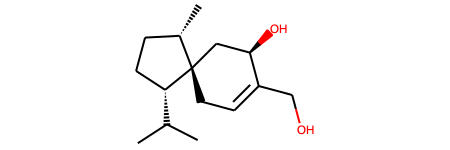

In [21]:
mols[119]

In [22]:
fingerprints = [Chem.RDKFingerprint(x) for x in mols]

In [35]:
fpp = open("finger_p.txt", 'r')
fp1 = [line.rstrip('\n') for line in fpp]
fp1 = [DataStructs.cDataStructs.CreateFromBitString(s) for s in fp1]

In [48]:
pubs_sim = []
for i in fingerprints:
    si = DataStructs.FingerprintSimilarity(fp1[58],i)
    pubs_sim.append(si)

In [51]:
with open("pubs_similarity.txt", 'w') as s:
        for s1 in pubs_sim:
                s.write(str(s1) + '\n')

In [61]:
pubs_sim2 = []
for i in fingerprints:
    si = DataStructs.FingerprintSimilarity(fp1[2], i)
    pubs_sim2.append(si)

In [64]:
with open("pubs_othersim.txt", 'w') as s:
    for s1 in pubs_sim2:
        s.write(str(s1) + '\n')

In [10]:
psim1 = open("pubs_similarity.txt", 'r')
psim11 = [line.rstrip('\n') for line in psim1]

In [13]:
psim2 = open("pubs_othersim.txt", 'r')
psim22 = [line.rstrip('\n') for line in psim2]

In [22]:
dict1={'SMILES':smiles, 'DEHP similarity':psim11, 'Similarity with Sodium polynaphthalenesulfonate':psim22}
sim_organics = pd.DataFrame(dict1)

In [23]:
sim_organics

,SMILES,DEHP similarity,Similarity with Sodium polynaphthalenesulfonate
0,C[C@H]1[C@@](O1)(C)C(=O)O[C@@H]2[C@H]3[C@@H]([...,0.19824561403508772,0.13254035683942225
1,CC1/C=C/C=C/CC/C=C/C=C/C=C/C=C/C(CC2C(C(CC(O2)...,0.1908831908831909,0.12430939226519337
2,CC1(CC[C@@H]([C@@]2([C@@H]1C[C@H]([C@]34[C@H]2...,0.18758256274768825,0.1116816431322208
3,CCN1C[C@@]2([C@@H](C[C@@H](C34[C@@H]2[C@H](C(C...,0.3038728897715988,0.1459265890778872
4,[H+].C1=CC=C(C=C1)N(N=NC2=CC=C(C=C2)S(=O)(=O)[...,0.11194029850746269,0.29454545454545455
...,...,...,...
66254,C(CCl)Cl,0.007957559681697613,0.005797101449275362
66255,CCC(C)(C(C(=O)O)O)O,0.13559322033898305,0.05450733752620545
66256,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,0.08881578947368421,0.1073943661971831
66257,CC(CN)O,0.02617801047120419,0.008426966292134831


In [26]:
sim_organics.sort_values(by=['DEHP similarity'])

,SMILES,DEHP similarity,Similarity with Sodium polynaphthalenesulfonate
61555,C[Hg+].[OH-],0.0,0.0
64519,CBr,0.0,0.0
64516,C#C,0.0,0.0029411764705882353
64515,CCl,0.0,0.0
64514,CI,0.0,0.0
...,...,...,...
45391,CCC(CCC(C)O)COC(=O)C1=CC=CC=C1C(=O)O,0.9585492227979274,0.12441679626749612
43967,CCCC(CCC)COC(=O)C1=CC=CC=C1C(=O)OCC(CCC)CCC,0.9838709677419355,0.128
54316,CCCCCC(CCC)COC(=O)C1=CC=CC=C1C(=O)OCC(CCC)CCCCC,0.9841269841269841,0.12913385826771653
60551,CCCCC(CC)COC(=O)C1=CC=CC=C1C(=O)O,0.9946236559139785,0.1271860095389507


In [28]:
sim_organics.sort_values(by=['Similarity with Sodium polynaphthalenesulfonate'])

,SMILES,DEHP similarity,Similarity with Sodium polynaphthalenesulfonate
62030,CCCCCCCCCCCCCCCCC,0.03208556149732621,0.0
32220,C#[O+],0.0,0.0
61505,[O-][O-].[Ca+2],0.002680965147453083,0.0
61504,S=[Cd],0.0,0.0
61503,S=[Fe]=S,0.0,0.0
...,...,...,...
64090,C1=CC2=C(C=CC(=C2)S(=O)(=O)O)C=C1O,0.10314685314685315,0.5695538057742782
62383,C1=CC2=C(C=CC(=C2)S(=O)(=O)O)C=C1S(=O)(=O)O,0.08888888888888889,0.6323529411764706
63379,C1=CC=C2C=C(C=CC2=C1)S(=O)(=O)O,0.08905380333951762,0.6342182890855457
45551,C=O.C1=CC=C2C=C(C=CC2=C1)S(=O)(=O)O,0.08905380333951762,0.6342182890855457
